In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import analysis
import data_files

from machi_koro import cards
from machi_koro import game

## Part 1: The Dice

Roll each die, separately, 100 times on a flat surface.
Any rolls where the die hit another object were thrown out.

In [2]:
rolls = data_files.read_tsv('dice_rolls.tsv')

In [3]:
roll_counts = pd.DataFrame({
    "Green": rolls["Green"].value_counts().sort_index(),
    "Blue": rolls["Blue"].value_counts().sort_index()
})

In [4]:
def expected_occurrences_per(n):
    return math.ceil(1 / 6 * n)

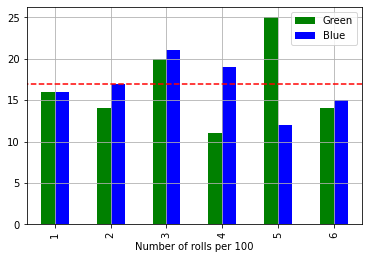

In [5]:
roll_counts.plot.bar(color=roll_counts.columns)
plt.xlabel("Number of rolls per 100")

# -1 is a hack to avoid having to re-index
xs = np.arange(-1, 7)
ys = [expected_occurrences_per(100)] * len(xs)
plt.plot(xs, ys, '--r')

plt.grid()

## Part 2: The Cards

- What is the expected value per roll for each card (assuming fair dice)?
- How long does it take for a card to break even in the best case?
- How long does it take for a card to break even in the average case?

In [6]:
distinct_cards = [
    cards.WheatField(),
    cards.Ranch(),
    cards.Bakery(),
    cards.Cafe(),
    cards.ConvenienceStore(),
    cards.Forest(),
    cards.Stadium(),
    cards.TvStation(),
    cards.BusinessCenter(),
    cards.CheeseFactory(),
    cards.FurnitureFactory(),
    cards.Mine(),
    cards.FamilyRestaurant(),
    cards.AppleOrchard(),
    cards.FruitVegetableMarket(),
    cards.TrainStation(),
    cards.ShoppingMall(),
    cards.AmusementPark(),
    cards.RadioTower()
]

In [7]:
# The factory cards depend on the other cards in your hand.
# Use one of each card for this analysis.
hand = [c for c in distinct_cards if c.color != cards.Color.GOLD]
# Add a Train Station just for reality's sake.
hand.append(cards.TrainStation())

def get_name(card: cards.Card):
    """Dataclasses have a string representation like `WheatField(color=<Color.BLUE: 2>, ...)`."""
    return str(card).split("(")[0]

In [8]:
# One die
pd.DataFrame({
    "Card": [get_name(card) for card in distinct_cards],
    "Expected coins per roll (2p)": [analysis.gross_expected_value(card, hand, two_dice=False, num_players=2) for card in distinct_cards],
    "Expected coins per roll (3p)": [analysis.gross_expected_value(card, hand, two_dice=False, num_players=3) for card in distinct_cards],
    "Expected coins per roll (4p)": [analysis.gross_expected_value(card, hand, two_dice=False, num_players=4) for card in distinct_cards],
    "Minimum rolls for payoff (4p)": [analysis.fastest_payoff(card, hand, num_players=4) for card in distinct_cards],
    "Expected rolls for payoff (4p)": [analysis.expected_payoff(card, hand, two_dice=False, num_players=4) for card in distinct_cards]
})

,Card,Expected coins per roll (2p),Expected coins per roll (3p),Expected coins per roll (4p),Minimum rolls for payoff (4p),Expected rolls for payoff (4p)
0,WheatField,0.166667,0.166667,0.166667,1.0,6.0
1,Ranch,0.166667,0.166667,0.166667,1.0,6.0
2,Bakery,0.333333,0.333333,0.333333,1.0,3.0
3,Cafe,0.166667,0.222222,0.250000,2.0,8.0
4,ConvenienceStore,0.250000,0.166667,0.125000,4.0,16.0
5,Forest,0.166667,0.166667,0.166667,3.0,18.0
6,Stadium,0.166667,0.222222,0.250000,4.0,24.0
7,TvStation,0.416667,0.277778,0.208333,8.0,34.0
8,BusinessCenter,0.000000,0.000000,0.000000,inf,inf
9,CheeseFactory,0.000000,0.000000,0.000000,8.0,inf


In [9]:
# Two dice
pd.DataFrame({
    "Card": [get_name(card) for card in distinct_cards],
    "Expected coins per roll (2p)": [analysis.gross_expected_value(card, hand, two_dice=True, num_players=2) for card in distinct_cards],
    "Expected coins per roll (3p)": [analysis.gross_expected_value(card, hand, two_dice=True, num_players=3) for card in distinct_cards],
    "Expected coins per roll (4p)": [analysis.gross_expected_value(card, hand, two_dice=True, num_players=4) for card in distinct_cards],
    "Minimum rolls for payoff (4p)": [analysis.fastest_payoff(card, hand, num_players=4) for card in distinct_cards],
    "Expected rolls for payoff (4p)": [analysis.expected_payoff(card, hand, two_dice=True, num_players=4) for card in distinct_cards]
})

,Card,Expected coins per roll (2p),Expected coins per roll (3p),Expected coins per roll (4p),Minimum rolls for payoff (4p),Expected rolls for payoff (4p)
0,WheatField,0.000000,0.000000,0.000000,1.0,inf
1,Ranch,0.027778,0.027778,0.027778,1.0,36.0
2,Bakery,0.083333,0.083333,0.083333,1.0,12.0
3,Cafe,0.041667,0.055556,0.062500,2.0,32.0
4,ConvenienceStore,0.125000,0.083333,0.062500,4.0,32.0
5,Forest,0.111111,0.111111,0.111111,3.0,27.0
6,Stadium,0.138889,0.185185,0.208333,4.0,29.0
7,TvStation,0.347222,0.231481,0.173611,8.0,41.0
8,BusinessCenter,0.000000,0.000000,0.000000,inf,inf
9,CheeseFactory,0.250000,0.166667,0.125000,8.0,40.0
